## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Loading the Dataset

11490434/11490434 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


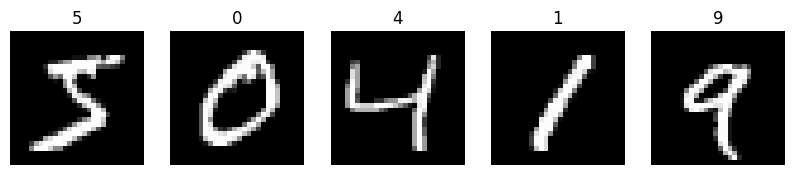

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Explore the dataset
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Display a few sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(str(train_labels[i]))
    plt.axis('off')
plt.show()


## Data Pre-processing

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
# Expand dimensions to add a channel dimension
train_images = tf.expand_dims(train_images, axis=-1)
test_images = tf.expand_dims(test_images, axis=-1)

In [5]:
# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## Model Fitting

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Adjust dropout rate as needed

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

In [8]:
# Fit the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 26s 7ms/step - loss: 0.2590 - accuracy: 0.9238 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0870 - accuracy: 0.9756 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.0269 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0592 - accuracy: 0.9824 - val_loss: 0.0259 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0284 - val_accuracy: 0.9911


## Model Evaluation

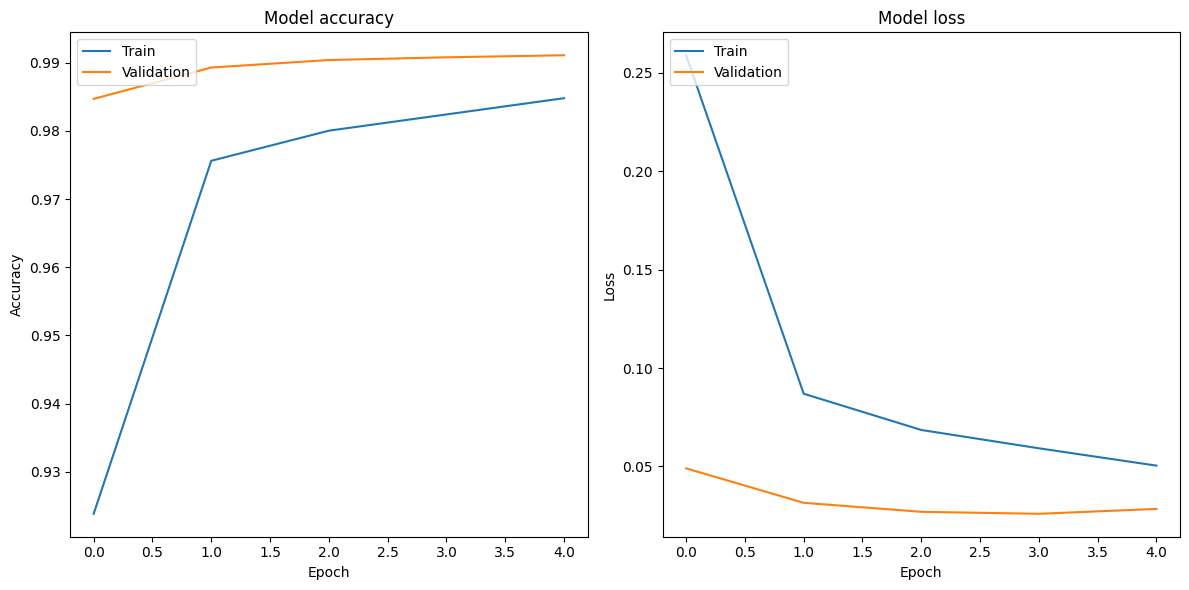

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 1s - loss: 0.0284 - accuracy: 0.9911 - 856ms/epoch - 3ms/step

Test accuracy: 0.991100013256073


313/313 [==============================] - 1s 2ms/step


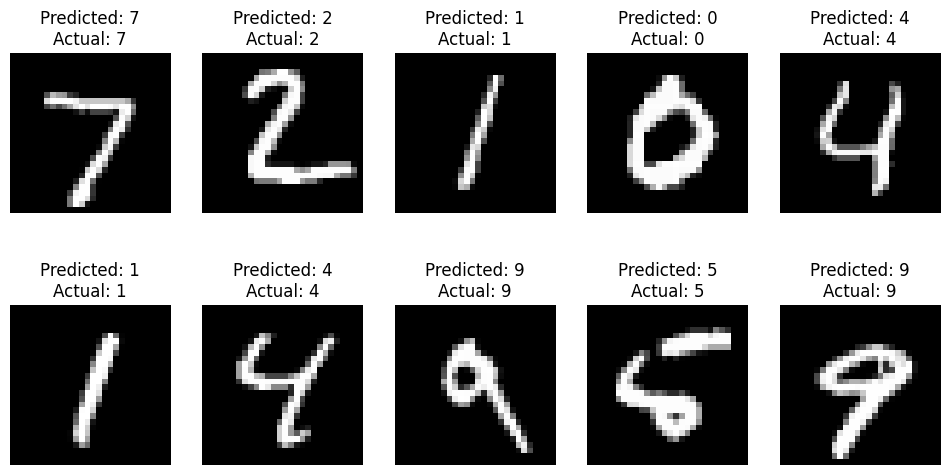

In [11]:
# Make predictions on test images
predictions = model.predict(test_images)

# Display some test images along with their predicted and actual labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')

    # Get the index of the true class
    true_class = np.argmax(test_labels[i])

    plt.title(f"Predicted: {tf.argmax(predictions[i])}\nActual: {true_class}")
    plt.axis('off')

plt.show()


# Conclusion:
The project of Handwritten Digit Recognition with a Neural Network trained on MNIST dataset has been accomplished successfully. The principal aim of the project was to develop and apply a model that can precisely categorize handwritten numbers.
Neural networks are effective at classifying images, as shown by the Handwritten Digit Recognition model's successful implementation. In addition to achieving its main goal, the project investigated methods for optimizing model performance via hyperparameter adjustments.
This project demonstrates the ability of machine learning to solve challenging issues and paves the way for future developments in pattern recognition and computer vision.